# EC2202 Linked Lists

**Disclaimer.**
This code examples are based on 

1. [KAIST CS206 (Professor Otfried Cheong)](https://otfried.org/courses/cs206/)
2. [LeetCode](https://leetcode.com/)
3. Coding Interviews

In [1]:
import doctest
import time

## A Basic Idea

We need a small node object that stores an element, and also links to another node object

In [2]:
class Node:
  def __init__(self, el, next=None):
    self.el = el
    self.next = next

  def __repr__(self):
    return "<" + repr(self.el) + ">"

In [3]:
a = Node("apples")
a = Node("oranges", a)
a = Node("strawberries", a)
print(a)
print(a.next)
print(a.next.next)
print(a.next.next.next is None)

<'strawberries'>
<'oranges'>
<'apples'>
True


Let’s write a function that will display all the elements of a list. One approach is to do it recursively:

In [ ]:
def display(a):
  if a is not None:
    print(a.el)
    display(a.next)

In [ ]:
display(a)

strawberries
oranges
apples


It is natural to use recursive functions to work with linked lists, since linked lists can be defined recursively: a linked list is either empty (that is, `None`), or consists of a `Node` whose `next` field points to a linked list.

With this function, we wouldn’t be able to display a linked list with more than 1000 elements—that’s not a lot (we'll cover why this happens in the **'Stack'** class.

Let’s solve the problem by rewriting the function using a loop, without recursion:

In [ ]:
def display(a):
  while a is not None:
    print(a.el)
    a = a.next

### 'ppp' Exercise

Can you implement a function that creates a linked list from a sequence of items?

In [ ]:
def create_linked_list(input_list):
  '''
  creates a linked list from a sequence of items
  >>> test_ll = create_linked_list([1, 2, 3, 4, 5])
  >>> display(test_ll)
  1
  2
  3
  4
  5
  '''
  # solution 1. O(N)
  # scan items from the back
  # head = None
  # for item in input_list[::-1]:
  #   head = Node(item, head)
  # return head

  # solution 2. O(N^2)
  # scan items from the start
  # head = None
  # for item in input_list:
  #   if head is None:
  #     head = Node(item)    [1]
  #   else:
  #     # Move to the tail (the last node)
  #     current_node = head
  #     while current_node.next:
  #       current_node = current_node.next
  #     current_node.next = Node(item)
  # return head

  # solution 3. O(N)
  # scan items from the start but more efficiently
  head = None
  tail = None
  
  for item in input_list:
    if head is None:
      head = Node(item)
      tail = head # when we only have 1 node, head and tail refer to the same node
    else:
      tail.next = Node(item) # attach the new node to the `next` of tail
      tail = tail.next # update the tail
          
  return head

In [ ]:
test_ll = create_linked_list([1, 2, 3, 4, 5])
display(test_ll)

## A LinkedList Class

The linked list we have implemented is not convenient to use. In this section, we will implement a class that handles all the gory chores under the hood.

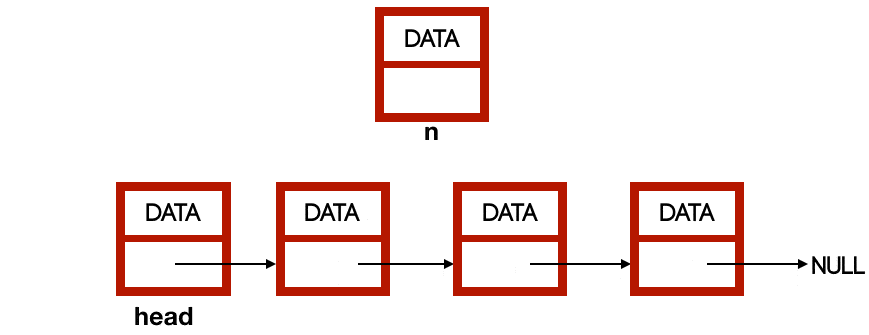

In [ ]:
class EmptyListError(Exception):
  pass

class LinkedList:
  # constructor creates an empty list
  def __init__(self, items=None):
    # stores only a reference to the first element of the list
    self._front = None
    if items:
      for item in items:
        self.append(item)
  
  # returns the front node
  def first(self):
    # if self._front is None:
    #   raise EmptyListError
    return self._front

  # checks if the list is empty
  def is_empty(self):
    return self._front is None

  # nicely-formatted LL representation
  def __repr__(self):
    if self.is_empty():
      return "[]"
    res = "["
    p = self._front
    while p is not None:
      res += repr(p.el)
      if p.next is not None:
        res += ", "
      p = p.next
    res += "]"
    return res

  # adds a new node at the front
  def prepend(self, el):
    self._front = Node(el, self._front)

  # removes the front node
  def remove_first(self):
    if self._front is None:
      raise EmptyListError
    self._front = self._front.next

  # inserts a new node into the linked list
  # just after the given node n
  def insert_after(self, n, el):
    n.next = Node(el, n.next)

  # deletes the node after node n
  def remove_after(self, n):
    if n.next is None:
      raise ValueError(n)
    n.next = n.next.next

  # returns the node just before the given node n
  def before(self, n):
    p = self._front
    while p.next != n:
      p = p.next
    return p
  
  # returns the last node
  def last(self):
    p = self._front
    while p.next != None:
      p = p.next
    return p
  
  # add an item at the end
  # 'ppp' exercise
  def append(self, el):
    if self.is_empty():
      self._front = Node(el)
    else:
      p = self.last()
      self.insert_after(p, el)
  
  # walk through the list and count node objects
  # 'ppp' exercise
  def __len__(self):
    if self.is_empty():
      return 0
    p = self._front
    count = 0
    while p is not None:
      count += 1
      p = p.next
    return count
  
  # iterator
  def __iter__(self):
    node = self._front
    while node:
      yield node.el
      node = node.next

In [ ]:
ll = LinkedList()
ll.append(5)
ll.prepend(23)
ll.prepend(7)
print(ll)
print(ll.last())
print(ll.first())
ll.remove_first()
print('after removing the first element')
print(ll)
print(len(ll))
ll.append(1)
print('after inserting 1 to the back')
print(ll)
print(len(ll))
print('iteration')
for item in ll:
  print(item)

[7, 23, 5]
<5>
<7>
after removing the first element
[23, 5]
2
after inserting 1 to the back
[23, 5, 1]
3
iteration
23
5
1


### 'ppp' Exercise (1)

Given a singly linked list, return another linked list that is the reverse of the first. Do not create Python lists.

In [ ]:
def reverse(linked_list):
  """
  Reverse the inputted linked list

  >>> ll = LinkedList([4, 2, 5, 1, 0, -3])
  >>> f_ll = reverse(ll)
  >>> f_ll
  [-3, 0, 1, 5, 2, 4]
  """
  new_list = LinkedList()
  node = linked_list.first()
  prev_node = None

  # We want to take the node from the original linked list and
  # prepend it to the new linked list
  for item in linked_list:
      new_node = Node(item)
      new_node.next = prev_node
      prev_node = new_node
  new_list._front = prev_node
  return new_list

In [ ]:
doctest.run_docstring_examples(reverse, globals(), False, __name__)

### 'ppp' Exercise (2)

Detect a loop in linked lists

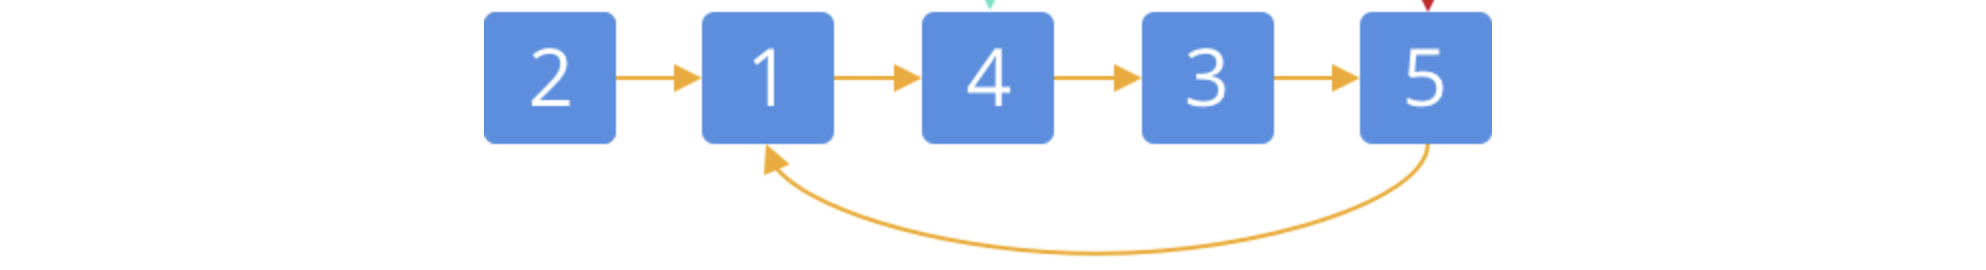

In [ ]:
def is_circular(linked_list):
  """
  determine wether the Linked List is circular or not

  >>> list_with_loop = LinkedList([2, -1, 3, 0, 5])
  >>> loop_start = list_with_loop.first().next
  >>> node = list_with_loop.first()
  >>> while node.next: 
  ...   node = node.next
  >>> node.next = loop_start
  >>> is_circular(list_with_loop)
  True
  >>> small_loop = LinkedList([0])
  >>> small_loop.first().next = small_loop.first()
  >>> is_circular(small_loop)
  True
  >>> is_circular(LinkedList([-4, 7, 2, 5, -1]))
  False
  >>> is_circular(LinkedList([1]))
  False
  >>> is_circular(LinkedList([]))
  False
  """
  
  # cur = linked_list.first()
  # visited = []
  # while cur is not None:
  #   if cur in visited:
  #     return True
  #   visited.append(cur)
  #   cur = cur.next
  # return False

  if linked_list.first() is None:
    return False
  
  slow = linked_list.first()
  fast = linked_list.first()
  
  while fast and fast.next:
    # slow pointer moves one node
    slow = slow.next
    # fast pointer moves two nodes
    fast = fast.next.next
    
    if slow == fast:
      return True

  # If we get to a node where fast doesn't have a next node or doesn't exist itself, 
  # the list has an end and isn't circular
  return False

In [ ]:
doctest.run_docstring_examples(is_circular, globals(), False, __name__)

## A DoublyLinkedList Class

Our linked list implementation is more powerful than the default Python list. However, it takes O(N) to append an item at the end. Furthermore, we want to conduct both forward and backward searches. For this, we are going to implement doubly linked lists where nodes are connected in both forward and backward directions :)

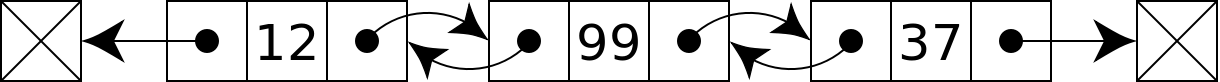

In [ ]:
class Node:
  def __init__(self, el, next=None, prev=None):
    self.el = el
    self.next = next
    self.prev = prev

  def __repr__(self):
    return "Node(" + repr(self.el) + ")"

Here is our first attempt to implement a doubly linked list:

In [ ]:
class DoublyLinkedList:
  def __init__(self, items=None):
      self._front = None
      self._rear = None

  def is_empty(self):
    return self._front == None
  
  def first(self):
    if self.is_empty():
      raise EmptyListError
    return self._front

  def last(self):
    if self.is_empty():
      raise EmptyListError
    return self._rear
  
  def __repr__(self):
    res = ""
    sep = "["
    p = self._front
    while p:
      res += sep + str(p.el)
      sep = ", "
      p = p.next
    res += "]"
    return res
  
  def __len__(self):
    p = self._front
    count = 0
    while p:
      count += 1
      p = p.next
    return count

  def insert_after(self, n, el):
    # n       ->       next_node
    # n -> new_node -> next_node
    next_node = n.next
    new_node = Node(el, next=next_node, prev=n)
    if next_node:
      next_node.prev = new_node
    else:
      self._rear = new_node
    n.next = new_node

  def prepend(self, el):
    if self.is_empty():
      self._front = Node(el)
      self._rear = self._front
    else:
      new_node = Node(el, next=self._front)
      self._front.prev = new_node
      self._front = new_node
  
  def append(self, el):
    if self.is_empty():
      self.prepend(el)
    else:
      new_node = Node(el, prev=self._rear)
      self._rear.next = new_node
      self._rear = new_node

  def remove(self, n):
    n.prev.next = n.next
    n.next.prev = n.prev

In [ ]:
DLL = DoublyLinkedList()
DLL.prepend(5)
print('DLL:', DLL)
print("first and last: ", DLL.first(), DLL.last(), len(DLL))
print()
DLL.append(6)
DLL.append(7)
DLL.prepend(8)
print('DLL:', DLL)
print("first and last: ", DLL.first(), DLL.last(), len(DLL))
print()
DLL.append(9)
print('DLL:', DLL)
print("first and last: ", DLL.first(), DLL.last(), len(DLL))
print()

DLL.prepend(4)
print('DLL:', DLL)
print("first and last: ", DLL.first(), DLL.last(), len(DLL))
print()

DLL: [5]
first and last:  Node(5) Node(5) 1

DLL: [8, 5, 6, 7]
first and last:  Node(8) Node(7) 4

DLL: [8, 5, 6, 7, 9]
first and last:  Node(8) Node(9) 5

DLL: [4, 8, 5, 6, 7, 9]
first and last:  Node(4) Node(9) 6



Our first implementation works fine. Nonetheless, it checks special cases quite a lot. We can resolve this issue and simplify our implementation by employing sentinel nodes. We create two dummy nodes as sentinel nodes and they do not contain meaningful data. Although sentinel nodes get placed at the front and the rear, the real first and last elements need to get accessed by

* `sentinel_front.next` and
* `sentinel_rear.prev`

In [ ]:
class DoublyLinkedList:
  def __init__(self):
    self._front = Node(None)
    self._rear = Node(None, prev=self._front)
    self._front.next = self._rear
  
  def is_empty(self):
    return self._front.next == self._rear

  def first(self):
    if self.is_empty():
      raise EmptyListError
    return self._front.next

  def last(self):
    if self.is_empty():
      raise EmptyListError
    return self._rear.prev

  def __repr__(self):
    res = "["
    p = self._front.next
    while p != self._rear:
      res += str(p.el)
      if p.next != self._rear:
        res += ", "
      p = p.next
    res += "]"
    return res

  def __len__(self):
    p = self._front.next
    count = 0
    while p != self._rear:
      count += 1
      p = p.next
    return count

  def insert_after(self, n, el):
    # n    ->    n.next
    # n -> el -> n.next
    p = Node(el, n.next, n)
    n.next.prev = p
    n.next = p

  def prepend(self, el):
    self.insert_after(self._front, el)
  
  def append(self, el):
    self.insert_after(self._rear.prev, el)

  def remove(self, n):
    n.prev.next = n.next
    n.next.prev = n.prev

In [ ]:
DLL = DoublyLinkedList()
DLL.prepend(5)
print('DLL:', DLL)
print("first and last: ", DLL.first(), DLL.last(), len(DLL))
print()
DLL.append(6)
DLL.append(7)
DLL.prepend(8)
print('DLL:', DLL)
print("first and last: ", DLL.first(), DLL.last(), len(DLL))
print()
DLL.append(9)
print('DLL:', DLL)
print("first and last: ", DLL.first(), DLL.last(), len(DLL))
print()

DLL.prepend(4)
print('DLL:', DLL)
print("first and last: ", DLL.first(), DLL.last(), len(DLL))
print()

DLL: [5]
first and last:  Node(5) Node(5) 1

DLL: [8, 5, 6, 7]
first and last:  Node(8) Node(7) 4

DLL: [8, 5, 6, 7, 9]
first and last:  Node(8) Node(9) 5

DLL: [4, 8, 5, 6, 7, 9]
first and last:  Node(4) Node(9) 6



## 'ppp' Exercises

### Q1. Add two numbers

[Qualcomm] Given two non-empty linked lists representing two non-negative integers where the digits are stored in reverse order and each of their nodes containing a single digit, add the two numbers and return the sum as a linked list.

In [ ]:
def add_nums(ll_first, ll_second):
  '''
  >>> ll_1 = LinkedList([4, 7])
  >>> ll_2 = LinkedList([3, 4, 5])
  >>> print(add_nums(ll_1, ll_2))  # 74 + 543 = 617
  [6, 1, 7]
  >>> ll_1 = LinkedList([6, 3])
  >>> ll_2 = LinkedList([7])
  >>> print(add_nums(ll_1, ll_2))  # 36 + 7 = 43
  [4, 3]
  >>> ll_1 = LinkedList([9, 8, 7, 6, 5])
  >>> ll_2 = LinkedList([4, 3, 2, 1])
  >>> print(add_nums(ll_1, ll_2))  # 56789 + 1234 = 58023
  [5, 8, 0, 2, 3]
  '''
  result = LinkedList()
  carry = 0
  node_first, node_second = ll_first.first(), ll_second.first()
  while node_first or node_second or carry:
    ll_val_1, ll_val_2 = 0, 0
    if node_first:
      ll_val_1   = node_first.el
      node_first = node_first.next
    if node_second:
      ll_val_2    = node_second.el
      node_second = node_second.next
    
    sum = ll_val_1 + ll_val_2 + carry
    val, carry = sum % 10, sum // 10
    result.prepend(val)
  return result

In [ ]:
doctest.run_docstring_examples(add_nums, globals(), False, __name__)

### Q2. Rotate lists

[Amazon & MS] Given a singly linked list of size N. The task is to left-shift the linked list by k nodes, where k is a given positive integer smaller than or equal to length of the linked list.

In [ ]:
def rotate_ll(linked_list, k):
  '''
  >>> ll = LinkedList([2, 4, 7, 8, 9])
  >>> print(rotate_ll(ll, k=0))
  [2, 4, 7, 8, 9]
  >>> ll = LinkedList([2, 4, 7, 8, 9])
  >>> print(rotate_ll(ll, k=1))
  [4, 7, 8, 9, 2]
  >>> ll = LinkedList([2, 4, 7, 8, 9])
  >>> print(rotate_ll(ll, k=2))
  [7, 8, 9, 2, 4]
  >>> ll = LinkedList([2, 4, 7, 8, 9])
  >>> print(rotate_ll(ll, k=3))
  [8, 9, 2, 4, 7]
  >>> ll = LinkedList([1, 2, 3, 4, 5, 6, 7, 8])
  >>> print(rotate_ll(ll, k=4))
  [5, 6, 7, 8, 1, 2, 3, 4]
  '''
  k = k % len(linked_list)
  if k == 0: 
    return linked_list
  
  current = linked_list.first()
  
  # current will either point to k-th or None after this loop
  count = 1
  while(count < k and current is not None):
    current = current.next
    count += 1

  # current points to k-th node. Store it in a variable
  kth_node = current

  # current will point to last node after this loop
  while(current.next is not None):
    current = current.next

  # Change next of last node to previous head
  current.next = linked_list._front
  
  # Change head to (k + 1)th node
  linked_list._front = kth_node.next

  # change next of kth node to None
  kth_node.next = None
  return linked_list

In [ ]:
doctest.run_docstring_examples(rotate_ll, globals(), False, __name__)